# Anova
## Analisis de varianza

El objetivo es conocer si es razonable pensar que un efecto puede deberse al azar. En el caso anova sera categorico -> numerico

Para nuestro ejemplo supongamos 4 estados, soltero, casado, separado o viudo vs presión en sangre :)

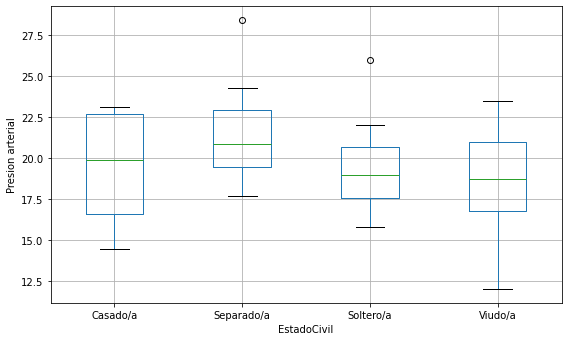

In [135]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
np.random.seed(42)
n_samples = 70
categories = ['Soltero/a', 'Casado/a', 'Separado/a', 'Viudo/a']

# Asocia promedios de target con categorías
category_means_sd = {'Soltero/a': (19,2.5), 'Casado/a': (20,3.5), 'Separado/a': (21,2.2), 'Viudo/a': (18,4)}

# Genera datos
categorical_column = np.random.choice(categories, size=n_samples)
target = np.zeros(n_samples)
for category, (mean, sd) in zip(category_means_sd.keys(), category_means_sd.values()):
    target[categorical_column == category] = np.random.normal(mean, sd, size=(categorical_column == category).sum())
    
df = pd.DataFrame({'EstadoCivil': categorical_column, 'Target': target})
df = shuffle(df).reset_index(drop=True)
ax = df.boxplot(by='EstadoCivil', column='Target', figsize=(8, 5))
ax.set_xlabel('EstadoCivil')
ax.set_ylabel('Presion arterial')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()
#df['EstadoCivil'].value_counts().plot(kind='bar')


Parece si hay una relación entre el estado civil y la presión...¿pero es real o se debe al azar? Por supuesto, asumo H0=ninguna diferencia

1.Agrupo todos los datos en una única caja</BR>
2.Mezclamos y extraemos 4 remuestreos con la cantidad original de elementos</BR>
3.Registramos la media de cada uno de los 4 grupos</BR>
4.Registramos la varianza entre las medias de los 4 grupos</BR>
5.Repetimos pasos 2 a 4 muchas, digamos 1000 veces</BR>
¿En que proporción de tiempo la varianza muestreada de forma repetida excedio al varianza observada? Ese es el valor de p.
(Bruce, Bruce y Gedeck)


In [136]:
# medias y varianzas observadas
#Atención que es la varianza entre los grupos, no la varianza dentro del grupo
observed_variance = df.groupby('EstadoCivil').mean().var()[0]
print('Observed means:', df.groupby('EstadoCivil').mean().values.ravel())
print('Variance:', observed_variance)

Observed means: [19.55339574 21.31404554 19.40958978 18.71444172]
Variance: 1.2243778606309041


In [137]:
samples_per_category = df['EstadoCivil'].value_counts()
samples_per_category

EstadoCivil
Viudo/a       21
Separado/a    20
Soltero/a     15
Casado/a      14
Name: count, dtype: int64

In [138]:
means = []
variances = []
for i in range(1000):
    remaining_df = df.copy()
    lmeans = []
    for sc, j in zip(samples_per_category, range(len(samples_per_category))):
        sample = remaining_df.sample(n=sc, random_state=i)  # Selección sin reposición
        lmeans.append(sample["Target"].mean())
        remaining_df = remaining_df.drop(sample.index)
        
    variances.append(np.var(lmeans))    
    means.append(lmeans)
    



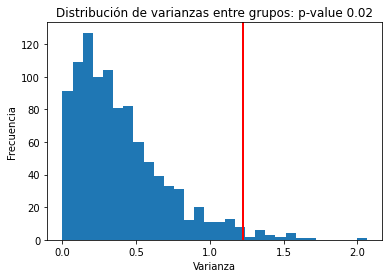

In [139]:
p_value = np.mean([var > observed_variance for var in variances])
plt.hist(variances, bins=30)
plt.axvline(x = observed_variance, color='r', lw=2)
plt.xlabel('Varianza')
plt.ylabel('Frecuencia')
plt.title('Distribución de varianzas entre grupos: p-value {:.2f}'.format(p_value))
plt.show()